In [1]:
# 必要なパッケージを呼び出す
using NLsolve
using Plots

In [2]:
# MATLABではグローバル変数を使って関数への変数受け渡しを行う
# Julia/Pythonではコンストラクタを用いる

# ギリシャ文字の使用は不可とする
struct Model{TI<:Integer, TF<:AbstractFloat}

    # カリブレーション
    alpha::TF 
    beta::TF           
    delta::TF 
    Abar::TF

    # 定常状態の値
    kss::TF
    css::TF    
    
    # 移行過程に関する変数
    T::TI

end

In [26]:
# カリブレーション
alpha = 0.4; 
beta = 0.96;
delta = 1.0; 
Abar = 1.0;

# 定常状態の値
kss = (alpha*beta*Abar/(1-beta*(1-delta)))^(1/(1-alpha));
css = Abar*kss^alpha - delta*kss;

# 移行過程に関する変数
T = 100; 

# k の初期値
k0 = 0.1*kss; 

##### 後ろ向き帰納法によって移行経路を解く(transition2.m に対応)

In [27]:
m = Model(alpha,beta,delta,Abar,kss,css,T);

# imaginary states
kvec0 = collect(range(k0,m.kss,m.T));
kvec1 = copy(kvec0);
yvec = zeros(m.T);
rvec = zeros(m.T);
wvec = zeros(m.T);
cvec = zeros(m.T);
kvec = zeros(m.T);

lamk = 0.9;
diff = 1e+4;
crit = 1e-4;
iter = 0;

while diff > crit

    yvec .= m.Abar .* (kvec0 .^ m.alpha);
    rvec .= m.alpha .* yvec./kvec0;
    wvec .= (1-m.alpha) .* yvec;
    
    cvec[m.T] = css;
    for i in T-1:-1:1 # t=T-1,...,1,0
        cvec[i] = cvec[i+1]/(beta*(1+rvec[i+1]-delta));
    end

    kvec[1] = k0;
    for j in 1:T-1
        kvec[j+1] = yvec[j] - cvec[j] + (1-m.delta)*kvec[j]; # k1,k2,...,kT
    end

    # update
    kvec1 = lamk*kvec0 + (1-lamk)*kvec;

    diff = maximum(abs.(kvec1-kvec0));
    kvec0 = copy(kvec1);
    iter += 1;

    # use the terminal condition as the criterion
    println([iter, diff])
    flush(stdout)
end

[1.0, 0.030751717589878352]
[2.0, 0.030881088034550308]
[3.0, 0.030696004174300878]
[4.0, 0.03043485631161033]
[5.0, 0.0304372208476984]
[6.0, 0.02328467940886844]
[7.0, 0.027439423555226383]
[8.0, 0.027487768525698703]
[9.0, 0.02430725855220367]
[10.0, 0.017743616137073273]
[11.0, 0.09065670158001038]
[12.0, 0.05009779566826314]
[13.0, 0.02908741278075036]
[14.0, 0.028060162606916017]
[15.0, 0.026477387127985308]
[16.0, 0.020896922417344727]
[17.0, 0.016143808924757724]
[18.0, 0.051165593171116214]
[19.0, 0.040965985661096355]
[20.0, 0.028387036800988502]
[21.0, 0.02092219614744653]
[22.0, 0.022678422251538377]
[23.0, 0.021157188553934447]
[24.0, 0.017785889279608197]
[25.0, 0.014570711988681234]
[26.0, 0.02353384990415089]
[27.0, 0.03135004046605222]
[28.0, 0.026270179075443184]
[29.0, 0.02010766086276594]
[30.0, 0.01563152320542327]
[31.0, 0.016205012815764697]
[32.0, 0.016596554095543364]
[33.0, 0.015006759258535451]
[34.0, 0.012674892496211676]
[35.0, 0.010652900265492482]
[36.0, 

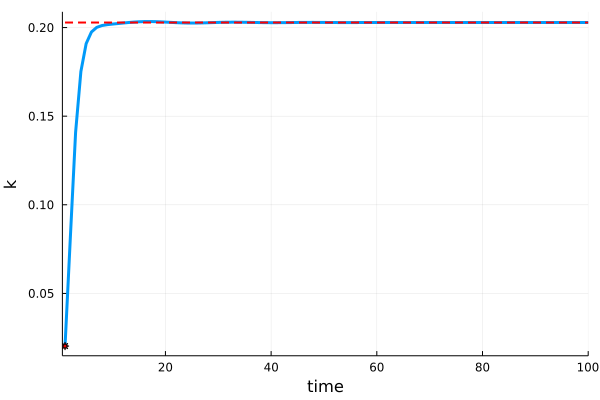

In [28]:
plot(kvec[1:T],legend=false,lw=3)
scatter!([1.0],[kvec[1]],c=:red,markershape=:star8)
plot!([1,100],[m.kss,m.kss],c=:red,ls=:dash,lw=2)
xlabel!("time")
ylabel!("k")
xlims!(0.5,m.T)

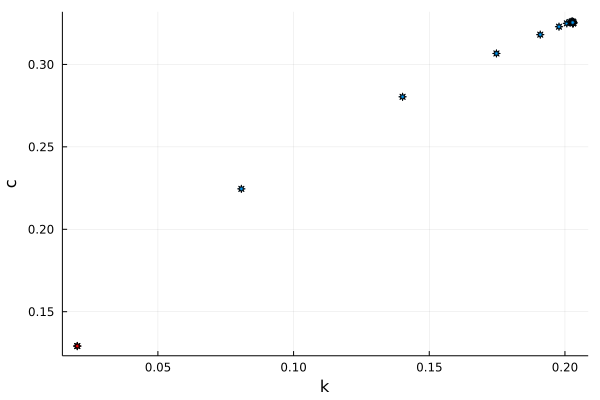

In [29]:
scatter(kvec0,cvec,markershape=:star8,legend=false)
scatter!([kvec0[1]],[cvec[1]],markershape=:star8,c=:red)
xlabel!("k")
ylabel!("c")